Example script comparing precision and timestep of different numerical integration methods

We will calculate an object falling from a height, since we know the precise answer analytically

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#gravitational constant
g = 9.8

#initial conditions
y0 = 10.0
v0 = 0.0

#known impact time
#known impact velocity
t_true = np.sqrt(2*y0/g)
v_true = -g*t_true

#create an array of ever-small timesteps
snum = 10
tstep = 0.01*(2.0**(-np.arange(snum)))

dt_ec = np.zeros(snum)
dv_ec = np.zeros(snum)
dt_er = np.zeros(snum)
dv_er = np.zeros(snum)


Numerically integrate using Euler-Cromer (1st-order)

In [4]:
#Calculate impact time and impact velocity
for lp in range(snum):
  t = 0
  y = y0
  v = v0
  impact = 0
  while (not impact):
    y_old = y
    v_old = v
    t += tstep[lp]
    y = y +v*tstep[lp]
    v = v -g*tstep[lp]
    if (y < 0):
      impact = 1
      #estimate final velocity
      v = v_old + (v-v_old)*(y_old-0)/(y_old-y)
      #estimate final impact time
      t = t - tstep[lp]*(1-(y_old-0)/(y_old-y))
  
  dt_ec[lp] = np.abs(t-t_true)/t_true
  dv_ec[lp] = np.abs((v-v_true)/v_true)

Numerically integrate using Euler-Richardson (2nd-order)

In [5]:
#Calculate impact time and impact velocity
for lp in range(snum):
  t = 0
  y = y0
  v = v0
  impact = 0
  while (not impact):
    y_old = y
    v_old = v
    t += tstep[lp]
    #intermediate step
    ym = y+0.5*v*tstep[lp]
    vm = v-0.5*g*tstep[lp]
    y = y +vm*tstep[lp]
    v = v -g*tstep[lp]
    if (y < 0):
      impact = 1
      #estimate final velocity
      v = v_old + (v-v_old)*(y_old-0)/(y_old-y)
      #estimate final impact time
      t = t - tstep[lp]*(1-(y_old-0)/(y_old-y))
  
  dt_er[lp] = np.abs(t-t_true)/t_true
  dv_er[lp] = np.abs((v-v_true)/v_true)


Plotting

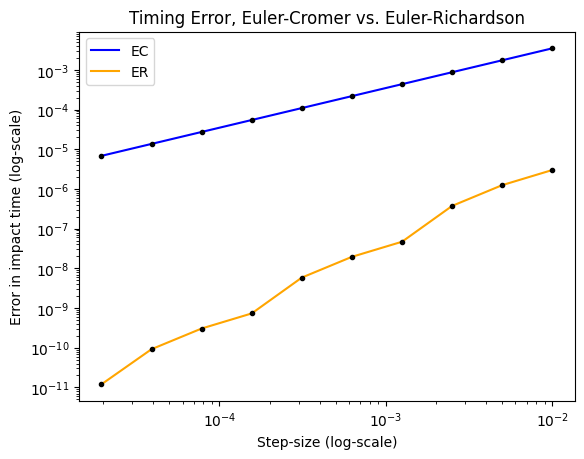

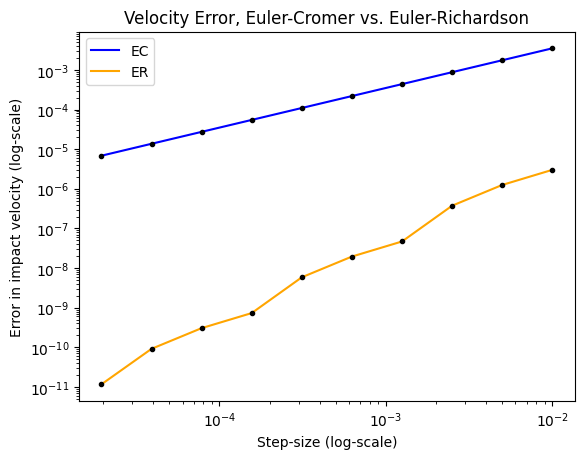

In [6]:
plt.loglog(tstep,dt_ec,color='blue',label='EC')
plt.loglog(tstep,dt_ec,color='black',linestyle=' ',marker='.')
plt.loglog(tstep,dt_er,color='orange',label='ER')
plt.loglog(tstep,dt_er,color='black',linestyle=' ',marker='.')
plt.xlabel('Step-size (log-scale)')
plt.ylabel('Error in impact time (log-scale)')
plt.title('Timing Error, Euler-Cromer vs. Euler-Richardson')
plt.legend()
plt.savefig('day2_fall_1.png', bbox_inches='tight')
plt.show()

plt.loglog(tstep,dv_ec,color='blue',label='EC')
plt.loglog(tstep,dv_ec,color='black',linestyle=' ',marker='.')
plt.loglog(tstep,dv_er,color='orange',label='ER')
plt.loglog(tstep,dv_er,color='black',linestyle=' ',marker='.')
plt.xlabel('Step-size (log-scale)')
plt.ylabel('Error in impact velocity (log-scale)')
plt.title('Velocity Error, Euler-Cromer vs. Euler-Richardson')
plt.legend()
plt.savefig('day2_fall_2.png', bbox_inches='tight')
plt.show()
